**Stock Market Prediction and Forecating using Stacked LSTM**

In [1]:
import pandas_datareader as pdr

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
key = ''
df = pdr.get_data_tiingo('AAPL', api_key = key)

In [3]:
df.to_csv('AAPL.csv')

In [4]:
import pandas as pd

In [7]:
df = pd.read_csv('AAPL.csv')
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2015-07-13 00:00:00+00:00,125.66,125.755,124.32,125.03,41440538,115.798631,115.886175,114.563789,115.218071,41440538,0.0,1.0
1,AAPL,2015-07-14 00:00:00+00:00,125.61,126.370,125.04,126.04,31768139,115.752554,116.452912,115.227286,116.148810,31768139,0.0,1.0
2,AAPL,2015-07-15 00:00:00+00:00,126.82,127.150,125.58,125.72,33649200,116.867598,117.171700,115.724909,115.853922,33649200,0.0,1.0
3,AAPL,2015-07-16 00:00:00+00:00,128.51,128.570,127.35,127.74,36222447,118.424972,118.480264,117.356005,117.715399,36222447,0.0,1.0
4,AAPL,2015-07-17 00:00:00+00:00,129.62,129.620,128.31,129.08,46164710,119.447863,119.447863,118.240668,118.950241,46164710,0.0,1.0


In [9]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,AAPL,2020-07-02 00:00:00+00:00,364.11,370.47,363.64,367.85,28814500,364.11,370.47,363.64,367.85,28814500,0.0,1.0
1254,AAPL,2020-07-06 00:00:00+00:00,373.85,375.78,369.87,370.00,29745900,373.85,375.78,369.87,370.00,29745900,0.0,1.0
1255,AAPL,2020-07-07 00:00:00+00:00,372.69,378.62,372.23,375.41,28207000,372.69,378.62,372.23,375.41,28207000,0.0,1.0
1256,AAPL,2020-07-08 00:00:00+00:00,381.37,381.50,376.36,376.72,29274500,381.37,381.50,376.36,376.72,29274500,0.0,1.0
1257,AAPL,2020-07-09 00:00:00+00:00,382.73,393.91,378.69,385.05,31420400,382.73,393.91,378.69,385.05,31420400,0.0,1.0


In [10]:
df1 = df.reset_index()['close']

In [12]:
df1.shape

(1258,)

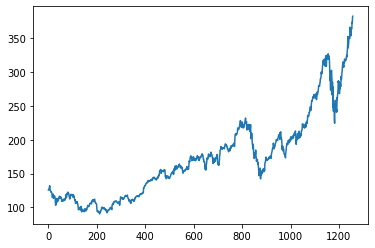

In [14]:
import matplotlib.pyplot as plt
plt.plot(df1)
plt.show()

In [15]:
df1

0       125.66
1       125.61
2       126.82
3       128.51
4       129.62
         ...  
1253    364.11
1254    373.85
1255    372.69
1256    381.37
1257    382.73
Name: close, Length: 1258, dtype: float64

In [17]:
#rescaling as LSTM is sensitive to the scale of data
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [20]:
df1

array([[0.12079756],
       [0.12062656],
       [0.12476487],
       ...,
       [0.9656623 ],
       [0.99534868],
       [1.        ]])

In [21]:
df1.shape

(1258, 1)

In [30]:
#splitting dataset into train and test spilt
training_size = int(len(df1)*0.70)
test_size = len(df1) - training_size
train_data, test_data = df1[0:training_size, :], df1[training_size:len(df1), :1]

In [31]:
training_size

880

In [32]:
test_size

378

In [39]:
def create_dataset(dataset, time_step =1):
  dataX, dataY = [], []
  for i in range(len(dataset) - time_step-1):
    a = dataset[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(dataset[i + time_step, 0])
  return np.array(dataX),np.array(dataY) 

In [40]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [41]:
X_train

array([[0.12079756, 0.12062656, 0.12476487, ..., 0.09394986, 0.09562571,
        0.09234242],
       [0.12062656, 0.12476487, 0.13054482, ..., 0.09562571, 0.09234242,
        0.08871712],
       [0.12476487, 0.13054482, 0.13434112, ..., 0.09234242, 0.08871712,
        0.08502343],
       ...,
       [0.40541742, 0.4008003 , 0.40538322, ..., 0.2253497 , 0.23051404,
        0.23112966],
       [0.4008003 , 0.40538322, 0.4083929 , ..., 0.23051404, 0.23112966,
        0.17733165],
       [0.40538322, 0.4083929 , 0.41006874, ..., 0.23112966, 0.17733165,
        0.19809159]])

In [42]:
X_train.shape

(779, 100)

In [43]:
y_train.shape

(779,)

In [45]:
X_test.shape

(277, 100)

In [46]:
#reshape the input into 3D shape
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1],1)

In [48]:
import tensorflow

In [50]:
#creating the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [51]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [52]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [53]:
model.fit(X_train,y_train, validation_data = (X_test, y_test), epochs=100, batch_size=64)

Epoch 1/100
13/13 [==============================] - 4s 275ms/step - loss: 0.0151 - val_loss: 0.0776
Epoch 2/100
13/13 [==============================] - 3s 194ms/step - loss: 0.0034 - val_loss: 0.0106
Epoch 3/100
13/13 [==============================] - 3s 198ms/step - loss: 0.0013 - val_loss: 0.0043
Epoch 4/100
13/13 [==============================] - 3s 194ms/step - loss: 7.7301e-04 - val_loss: 0.0048
Epoch 5/100
13/13 [==============================] - 3s 201ms/step - loss: 7.1296e-04 - val_loss: 0.0042
Epoch 6/100
13/13 [==============================] - 3s 210ms/step - loss: 6.3920e-04 - val_loss: 0.0039
Epoch 7/100
13/13 [==============================] - 3s 195ms/step - loss: 5.9142e-04 - val_loss: 0.0041
Epoch 8/100
13/13 [==============================] - 3s 196ms/step - loss: 5.7607e-04 - val_loss: 0.0033
Epoch 9/100
13/13 [==============================] - 3s 194ms/step - loss: 5.4238e-04 - val_loss: 0.0052
Epoch 10/100
13/13 [==============================] - 3s 204ms/step

In [55]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [56]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [57]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

152.53999417522883

In [58]:
math.sqrt(mean_squared_error(y_test, test_predict))

263.306162431081

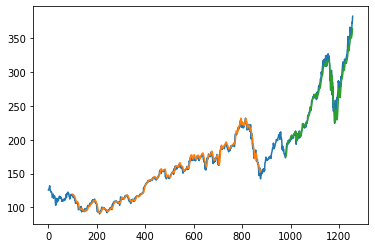

In [60]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

**Predicting for future 30 days**

In [62]:
len(test_data)

378

In [63]:
X_input = test_data[278:].reshape(1,-1)
X_input.shape

(1, 100)

In [64]:
temp_input = list(X_input)
temp_input = temp_input[0].tolist()

In [66]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = X_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.96306956]
101
1 day input [0.7978385  0.78648381 0.76168816 0.71083142 0.67628852 0.69191833
 0.62649201 0.6259448  0.71298608 0.68052943 0.72642703 0.69284175
 0.6795376  0.60135436 0.66691747 0.63302439 0.53999795 0.64171141
 0.51940901 0.55583296 0.53466261 0.52819864 0.47505045 0.45839461
 0.53538083 0.53072951 0.57491706 0.5383221  0.56250214 0.56072369
 0.51496289 0.52871165 0.51667294 0.58870002 0.57830295 0.60101235
 0.60757892 0.62556859 0.67276583 0.66380519 0.67153459 0.65823045
 0.63815452 0.60887855 0.63531585 0.63165635 0.65881186 0.65949588
 0.64379767 0.67509149 0.69585143 0.67967441 0.69366257 0.70871097
 0.71921064 0.72984712 0.75170149 0.76839153 0.75607921 0.74321967
 0.74968364 0.74342488 0.76822053 0.76199596 0.78282431 0.7746845
 0.78166148 0.77427409 0.77899381 0.77947262 0.77841239 0.79178494
 0.79688088 0.80296864 0.79339239 0.82478881 0.83149219 0.86750573
 0.89777352 0.8398372  0.84975546 0.86408564 0.89517425 0.89349841
 0.89397722 0.88710284 0.91839666 

In [67]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [68]:
len(df1)

1258

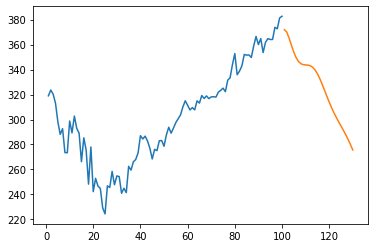

In [69]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

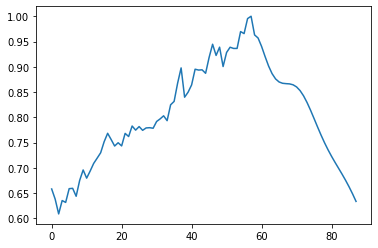

In [70]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

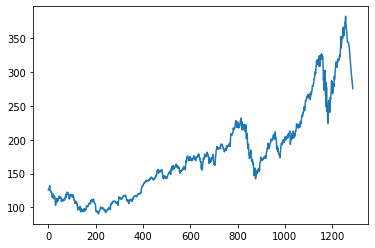

In [71]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)